# Visualizing the Convolution filters (fastai)

Describes a method to visualize the convolutional filters 

Follow below notebook for training and building the model. 
https://github.com/sairahul/notebooks/blob/master/devnagiri.ipynb

Blog: https://medium.com/@sairahul/image-classification-with-fastai-763358f5c80

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pathlib import Path
from concurrent.futures import ThreadPoolExecutor
import cv2
import shutil

from fastai import *
from fastai.vision import *

In [2]:
path = './DevanagariHandwrittenCharacterDataset/'

In [7]:
tfms = get_transforms(do_flip=False, xtra_tfms=None)
data = ImageDataBunch.from_folder(f'{path}', train='Train', valid='Test', ds_tfms=tfms, size=32)
learn = create_cnn(data, models.resnet18, metrics=accuracy)


In [8]:
learn.load('devnagiri-resnet18-v3')

In [9]:
learn

ClassificationLearner(data=<fastai.vision.data.ImageDataBunch object at 0x7efdf012d5c0>, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1

In [10]:
# How to set the random seed
# How to see the activation maps
# cwerner/fastclass
# https://www.youtube.com/watch?v=Pv0hzJCXBro


In [5]:
learn.model[0][0].weight.data[0].shape

torch.Size([3, 7, 7])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


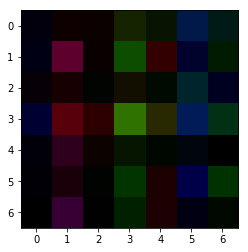

In [21]:
a = learn.model[0][0].weight.data[0].reshape(7, 7, 3).cpu().numpy()
plt.imshow(learn.model[0][0].weight.data[1].reshape(7, 7, 3))
#learn.model[0][0].weight.data[0].reshape(7, 7, 3)

In [22]:
learn.model[0][0].weight.data.shape[0]

64

In [37]:
def plot_filters(dataset, cols=10):
    rows = int(np.ceil(dataset.shape[0]/float(cols)))
    f, ax_arr = plt.subplots(rows, cols, figsize=(18, 16))
    plt.axis('off')
    for i, image_data in enumerate(dataset):
        row = int(i/cols)
        col = int(i%cols)
        image = image_data.cpu().numpy().transpose((1, 2, 0))
        ax_arr[row, col].imshow(image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

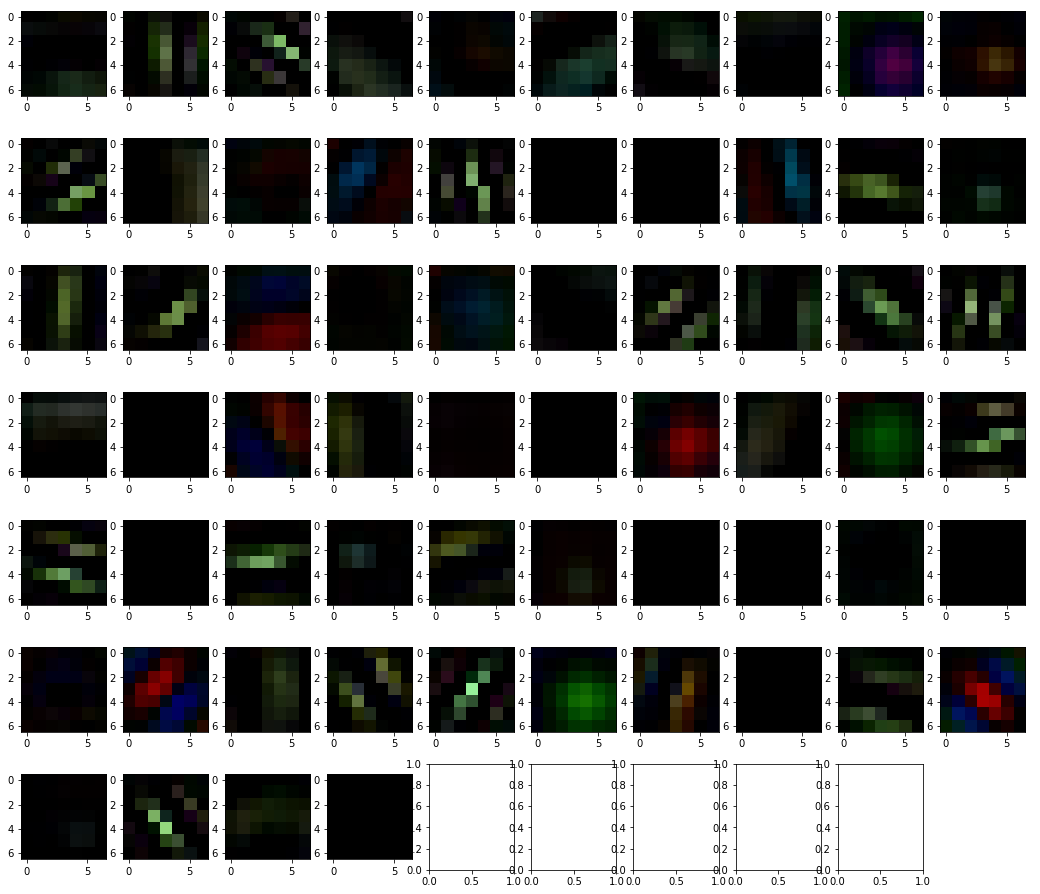

In [38]:
plot_filters(learn.model[0][0].weight.data)